# TS Forecasting with MLP

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [2]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
data.head(10)

,Date,Temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], date_parser=dateparse)

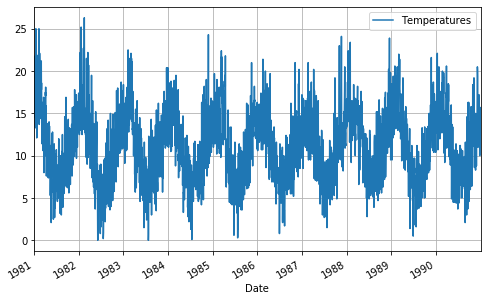

In [4]:
data.plot(x='Date', y='Temperatures', figsize=(8, 5))
plt.grid(True)

In [5]:
def data_norm(data):
    mini = min(data)
    maxi = max(data)
    return (data-mini)/(maxi-mini)

In [6]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
       
    return np.array(X), np.array(y)

In [7]:
step = 30

In [8]:
X, y = split_sequence(sequence=data_norm(data['Temperatures']),n_steps=step)

In [9]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = split_data(X, y, train_size=0.3)

In [11]:
def network_model():
    model = Sequential()
    
    model.add(Dense(30, input_dim=step, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
mlp_regressor = KerasRegressor(build_fn=network_model, epochs=100, batch_size=20)

In [13]:
model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)

W0627 14:44:43.090901 140535839586112 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 14:44:43.416361 140535839586112 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 14:44:43.438167 140535839586112 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0627 14:44:43.472035 140535839586112 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 14:

Train on 1086 samples, validate on 2534 samples
Epoch 1/100
1086/1086 [==============================] - 1s 1ms/step - loss: 0.0249 - acc: 0.0028 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 2/100
1086/1086 [==============================] - 0s 98us/step - loss: 0.0128 - acc: 0.0028 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 3/100
1086/1086 [==============================] - 0s 103us/step - loss: 0.0124 - acc: 0.0028 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 4/100
1086/1086 [==============================] - 0s 100us/step - loss: 0.0120 - acc: 0.0028 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 5/100
1086/1086 [==============================] - 0s 98us/step - loss: 0.0117 - acc: 0.0028 - val_loss: 0.0093 - val_acc: 0.0000e+00
Epoch 6/100
1086/1086 [==============================] - 0s 100us/step - loss: 0.0113 - acc: 0.0028 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 7/100
1086/1086 [==============================] - 0s 96us/step - loss: 0.0112 - acc: 0.0028 - val_loss:

1086/1086 [==============================] - 0s 98us/step - loss: 0.0094 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 59/100
1086/1086 [==============================] - 0s 82us/step - loss: 0.0093 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 60/100
1086/1086 [==============================] - 0s 102us/step - loss: 0.0094 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 61/100
1086/1086 [==============================] - 0s 99us/step - loss: 0.0092 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 62/100
1086/1086 [==============================] - 0s 92us/step - loss: 0.0093 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 63/100
1086/1086 [==============================] - 0s 97us/step - loss: 0.0093 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 64/100
1086/1086 [==============================] - 0s 105us/step - loss: 0.0095 - acc: 0.0028 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 65/100
1086/1086 [

In [14]:
pred = mlp_regressor.predict(X_test)

In [15]:
def MAPE(y_test, prediction):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - prediction[i]) / y_test[i]) * 100
    media_erro = soma / len(y_test)
    return media_erro.round(5)

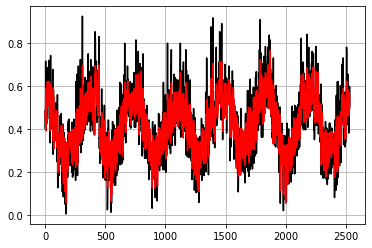

In [16]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')
plt.grid(True)

In [17]:
MAPE(y_test, pred)

24.79508